David Adeyemi Runsewe (19046670)


The aim of data fitting by assign a ‘Best fit’, function or curve is to capture trend in data that allows prediction of future behavior of data 
series, this analysis will run a data fitting on world bank data on Indians Total reserves over the provided time range using logistic 
and exponential growth model. And predictions of future values with error estimates.

In [1]:
import pandas as pd
import scipy.optimize as opt
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt

In [14]:
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    f = scale * np.exp(growth * (t-1960))
    return f

def logistics(t, scale, growth, t0):
    """ Computes logistics function with scale, growth raat
    and time of the turning point as free parameters
    """
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    return f

In [15]:
def read_worldbank(indicators,countries,starttimerange,endtimerange):
    """ Read world banks data, and return both raw data frame and 
    a transposed data frame with edited index or columns names
    """
    raw_df = wb.data.DataFrame(indicators, countries, time=range(starttimerange, endtimerange))
    transposed_df = raw_df.transpose()
    transposed_df = transposed_df.reset_index()
    transposed_df = transposed_df.set_axis(['YEARS','TOTAL_RESERVE','GDP'],axis=1)
    #Loop through YEARS index to change years from string to Int datatype
    transposed_df['YEARS'] = [int(x[2:]) for x in transposed_df['YEARS']]
    return raw_df,transposed_df
    

In [16]:
raw_df,df = read_worldbank(['FI.RES.TOTL.CD','NY.GDP.PCAP.CD'],['IND'],1960,2019)
df.head()

,YEARS,TOTAL_RESERVE,GDP
0,1960,6.745366e+08,82.188603
1,1961,6.663571e+08,85.354301
2,1962,5.127918e+08,89.881756
3,1963,6.078625e+08,101.126429
4,1964,4.991451e+08,115.537496


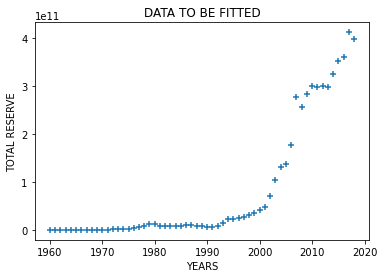

In [17]:
# A plot of our data set before fitting
plt.scatter(df['YEARS'],df['TOTAL_RESERVE'],marker='+')
plt.title("DATA TO BE FITTED")
plt.xlabel("YEARS")
plt.ylabel("TOTAL RESERVE")
plt.show()

Here we fit exponential funtion with the initail parameters from our dataset

In [18]:
# Fitting exponential growth
popt, covar = opt.curve_fit(exp_growth, df["YEARS"], df["TOTAL_RESERVE"])

Fit parameter [2.10325259e+09 9.33327320e-02]


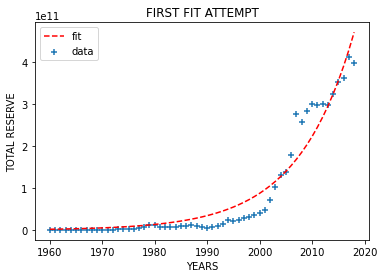

In [19]:
print("Fit parameter", popt)
# use *popt to pass on the fit parameters
df["TOTAL_RESERVE_EXP"] = exp_growth(df["YEARS"], *popt)

plt.figure()
plt.scatter(df["YEARS"], df["TOTAL_RESERVE"],marker="+",label="data")
plt.plot(df["YEARS"], df["TOTAL_RESERVE_EXP"], "--",label="fit",color='r')

plt.legend()
plt.title("FIRST FIT ATTEMPT")
plt.xlabel("YEARS")
plt.ylabel("TOTAL RESERVE")
plt.show()
print()

FIT PARAMETER [2.10337763e+09 9.33316132e-02]


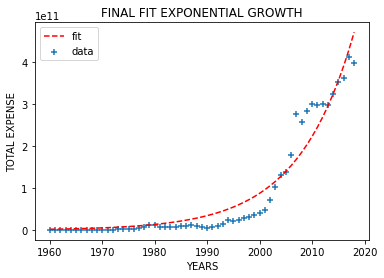

In [20]:
# fit exponential growth
popt, covar = opt.curve_fit(exp_growth, df["YEARS"],
df["TOTAL_RESERVE"], p0=[7.242784e+10, 0.05])
# much better
print("FIT PARAMETER", popt)
df["TOTAL_RESERVE_EXP"] = exp_growth(df["YEARS"], *popt)
plt.figure()
plt.scatter(df["YEARS"], df["TOTAL_RESERVE"],marker='+', label="data")
plt.plot(df["YEARS"], df["TOTAL_RESERVE_EXP"],"--", label="fit",color='r')
plt.legend()
plt.xlabel("YEARS")
plt.ylabel("TOTAL EXPENSE")
plt.title("FINAL FIT EXPONENTIAL GROWTH")
plt.show()
print()

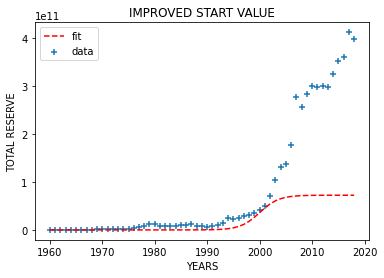

In [21]:
popt = [7.242784e+10, 0.55, 2000]
df["TOTAL_RESERVE_LOG"] = logistics(df["YEARS"], *popt)
plt.figure()
plt.scatter(df["YEARS"], df["TOTAL_RESERVE"],marker='+', label="data")
plt.plot(df["YEARS"], df["TOTAL_RESERVE_LOG"],"--", label="fit",color='r')
plt.legend()
plt.xlabel("YEARS")
plt.ylabel("TOTAL RESERVE")
plt.title("IMPROVED START VALUE")
plt.show()

FIT PARAMETER [3.85777938e+11 2.97937034e-01 2.00620759e+03]


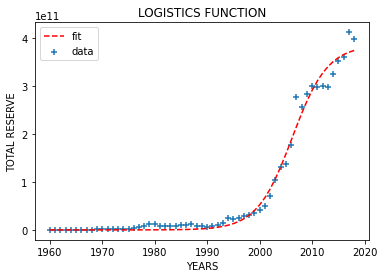

In [22]:
popt, covar = opt.curve_fit(logistics, df["YEARS"], df["TOTAL_RESERVE"],
p0=(7.242784e+10, 0.05, 1980.0))
print("FIT PARAMETER", popt)
df["TOTAL_RESERVE_LOG"] = logistics(df["YEARS"], *popt)
plt.figure()
plt.title("LOGISTICS FUNCTION")
plt.scatter(df["YEARS"], df["TOTAL_RESERVE"],marker='+', label='data')
plt.plot(df["YEARS"], df["TOTAL_RESERVE_LOG"],"--", label="fit",color='r')
plt.legend()
plt.xlabel("YEARS")
plt.ylabel("TOTAL RESERVE")
plt.show()

In [23]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

[1.03340023e+10 2.02874218e-02 3.12301929e-01]


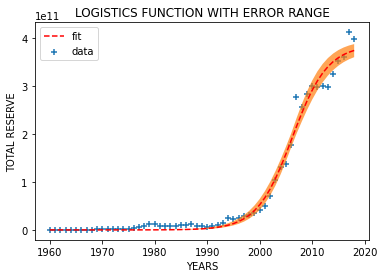

In [24]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))
print(sigma)

low, up = err_ranges(df["YEARS"], logistics, popt, sigma)

plt.figure()
plt.title("LOGISTICS FUNCTION WITH ERROR RANGE")
plt.scatter(df["YEARS"], df["TOTAL_RESERVE"],marker='+', label="data")
plt.plot(df["YEARS"], df["TOTAL_RESERVE_LOG"],"--", label="fit",color='r')

plt.fill_between(df["YEARS"], low, up, alpha=0.7)
plt.legend()
plt.xlabel("YEARS")
plt.ylabel("TOTAL RESERVE")
plt.show()


Predictions of future values with error estimates.

In [13]:
print(df.tail())
print()
print("PREDICTED TOTAL RESERVE")
low, up = err_ranges(2028, logistics, popt, sigma)
print("2028 between ", low, "and", up)
low, up = err_ranges(2038, logistics, popt, sigma)
print("2038 between ", low, "and", up)
low, up = err_ranges(2048, logistics, popt, sigma)
print("2048 between ", low, "and", up)

    YEARS  TOTAL_RESERVE          GDP  TOTAL_RESERVE_EXP  TOTAL_RESERVE_LOG
54   2014   3.250810e+11  1573.885642       3.248785e+11       3.513103e+11
55   2015   3.533191e+11  1605.605445       3.566598e+11       3.595881e+11
56   2016   3.616943e+11  1732.554242       3.915502e+11       3.659898e+11
57   2017   4.126138e+11  1980.667020       4.298537e+11       3.708915e+11
58   2018   3.991672e+11  1996.915087       4.719043e+11       3.746161e+11

PREDICTED TOTAL RESERVE
2028 between  374481609811.0777 and 395763206079.9359
2038 between  375383880461.76263 and 396097458229.7787
2048 between  375440196249.1628 and 396111339359.6892
